In [3]:
#Import the libraries
import math
import pandas_datareader as web 
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
#Get the stock quote 
df = web.DataReader('CODX', data_source = 'yahoo', start = '2019-11-04', end = '2020-03-09')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-04,1.00,0.960,0.967,0.967,29500,0.967
2019-11-05,1.00,0.965,0.980,0.970,21900,0.970
2019-11-06,1.00,0.850,1.000,0.930,57200,0.930
2019-11-07,0.95,0.920,0.920,0.930,9700,0.930
2019-11-08,1.00,0.910,0.920,0.950,67500,0.950
...,...,...,...,...,...,...
2020-03-03,16.98,13.650,14.390,14.360,16334600,14.360
2020-03-04,14.85,11.300,13.560,12.000,11639200,12.000
2020-03-05,15.50,13.560,14.630,14.250,22954600,14.250


In [5]:
#Get the number of rows and columns in the data set
df.shape

(86, 6)

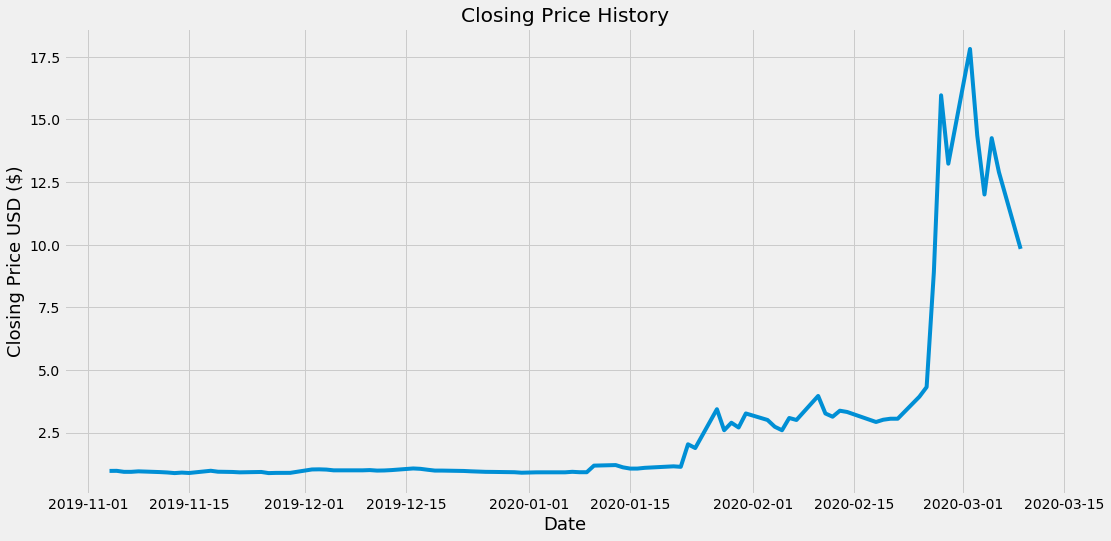

In [8]:
#Visualize the closing price history 
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.show()

In [9]:
#Create a new dataframe with only the "Close" column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

69

In [10]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[5.13880774e-03],
       [5.31600923e-03],
       [2.95333807e-03],
       [2.95333807e-03],
       [4.13467189e-03],
       [2.36267116e-03],
       [1.47666727e-03],
       [0.00000000e+00],
       [1.18133382e-03],
       [2.36267468e-04],
       [5.49320719e-03],
       [3.24867152e-03],
       [2.95333807e-03],
       [2.65800461e-03],
       [1.77200425e-03],
       [2.65800461e-03],
       [0.00000000e+00],
       [4.72534936e-04],
       [5.90666909e-04],
       [8.56467723e-03],
       [8.86001068e-03],
       [8.26934377e-03],
       [6.49734304e-03],
       [6.49734304e-03],
       [6.49734304e-03],
       [7.08800995e-03],
       [5.90667614e-03],
       [6.20200959e-03],
       [7.08800995e-03],
       [1.09273519e-02],
       [1.00413445e-02],
       [7.85587834e-03],
       [5.90667614e-03],
       [5.90667614e-03],
       [5.02067225e-03],
       [4.19373787e-03],
       [2.95333807e-03],
       [2.77613659e-03],
       [2.06733770e-03],
       [8.86000364e-04],


In [11]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x train and y train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i , 0])
    y_train.append(train_data[i, 0])
    if i<=60: 
        print(x_train)
        print(y_train)
        print()

[array([0.00513881, 0.00531601, 0.00295334, 0.00295334, 0.00413467,
       0.00236267, 0.00147667, 0.        , 0.00118133, 0.00023627,
       0.00549321, 0.00324867, 0.00295334, 0.002658  , 0.001772  ,
       0.002658  , 0.        , 0.00047253, 0.00059067, 0.00856468,
       0.00886001, 0.00826934, 0.00649734, 0.00649734, 0.00649734,
       0.00708801, 0.00590668, 0.00620201, 0.00708801, 0.01092735,
       0.01004134, 0.00785588, 0.00590668, 0.00590668, 0.00502067,
       0.00419374, 0.00295334, 0.00277614, 0.00206734, 0.000886  ,
       0.001772  , 0.00183107, 0.00183107, 0.0030124 , 0.00206734,
       0.00206734, 0.01760189, 0.01890136, 0.01358535, 0.01063201,
       0.01063201, 0.01240402, 0.01594802, 0.01476669, 0.06792676,
       0.05906675, 0.15062021, 0.10100413, 0.11872417, 0.10750148])]
[0.14057885821845872]



In [13]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(9, 60, 1)

In [16]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

Epoch 1/1
9/9 [==============================] - 2s 226ms/step - loss: 0.0063


In [19]:
#Create the testing data set
#Create a new array containing scaled vals from index 1543 to 2020
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [20]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [21]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
#Get the models predicted price values
predictions = model.predict(x_test)
prediction = scaler.inverse_transform(predictions)

In [25]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

8.35674550340456

/Users/josh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


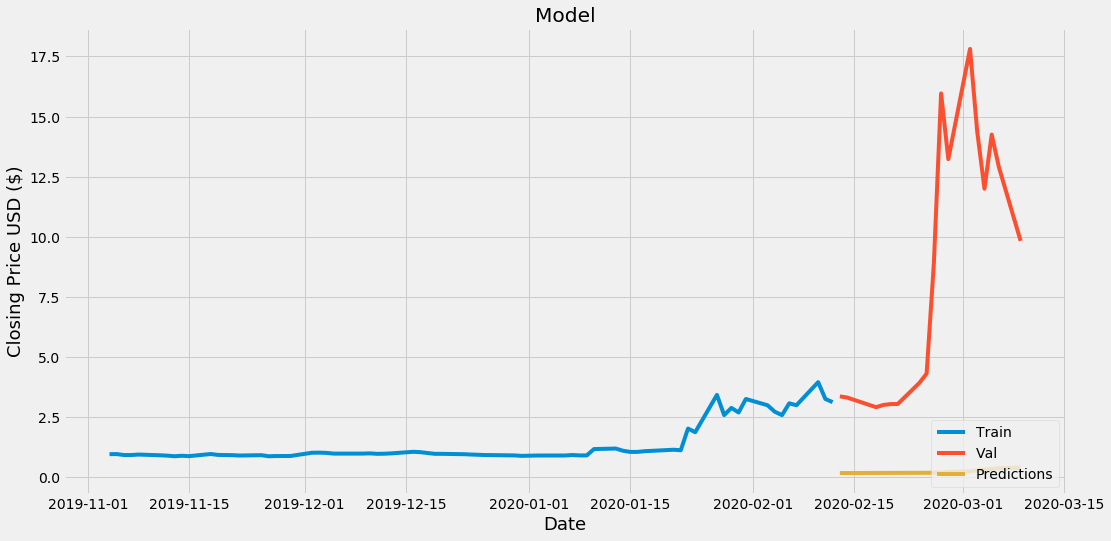

In [28]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [29]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-02-13,3.370000,0.179580
2020-02-14,3.320000,0.182631
2020-02-18,2.920000,0.185373
2020-02-19,3.010000,0.187280
2020-02-20,3.050000,0.188693
2020-02-21,3.050000,0.189778
2020-02-24,3.930000,0.190602
2020-02-25,4.315000,0.192389
2020-02-26,8.900000,0.195240


In [30]:
#Get the quote
codx_quote = web.DataReader('CODX',  data_source = 'yahoo', start = '2019-04-24', end = '2020-04-24')
#Create a new dataframe
new_df = codx_quote.filter(['Close'])
#Get the last 60 day closing price values and conver the dataframe to an array 
last_60_days= new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a nuympy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[9.0684185]]


In [31]:
#Get the quote
codx_quote2 = web.DataReader('CODX',  data_source = 'yahoo', start = '2020-04-24', end = '2020-04-24')
print(codx_quote2['Close'])

Date
2020-04-24    14.4
2020-04-24    14.4
Name: Close, dtype: float64
